<a href="https://colab.research.google.com/github/jakewalter/easyQuake/blob/master/examples/easyquake_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install easyQuake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.0 MB 2.1 MB/s 
     |████████████████████████████████| 421.8 MB 27 kB/s 
     |████████████████████████████████| 421.8 MB 5.6 kB/s 
     |████████████████████████████████| 2.9 MB 51.9 MB/s 
     |████████████████████████████████| 863 kB 64.5 MB/s 
     |████████████████████████████████| 14.3 MB 32.8 MB/s 
     |████████████████████████████████| 377 kB 74.2 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 3.8 MB 60.2 MB/s 
     |████████████████████████████████| 448 kB 75.0 MB/s 
     |████████████████████████████████| 6.3 MB 53.8 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 219 kB 55.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=c605991a5f7efda74e156b6bdfd93753c5bec3dca1291ed75c87ff0375674b3f
  

In [5]:
from easyQuake import download_mseed
from easyQuake import daterange
from datetime import date
from easyQuake import combine_associated
from easyQuake import detection_continuous
from easyQuake import association_continuous

from easyQuake import magnitude_quakeml
from easyQuake import simple_cat_df

import matplotlib.pyplot as plt
maxkm = 300
maxdist=300
lat_a = 42
lat_b = 47.5
lon_a = -118
lon_b = -111


start_date = date(2020, 3, 31)
end_date = date(2020, 4, 1)

project_code = 'idaho'
project_folder = '/content/id'
!mkdir /content/id
import os
print(os.getcwd())
%cd /content/id
!wget https://wichita.ogs.ou.edu/eq/tutorial/easyquake_tutorial_idaho.zip
!unzip easyquake_tutorial_idaho.zip
#!mkdir /content/data/id
#!pwd
#!wget https://www.jakewalter.net/data/waveforms.zip -P data/id/
#%cd data/id
#!unzip waveforms.zip
#%cd ../..

mkdir: cannot create directory ‘/content/id’: File exists
/content/id
/content/id
--2022-06-15 13:57:42--  https://wichita.ogs.ou.edu/eq/tutorial/easyquake_tutorial_idaho.zip
Resolving wichita.ogs.ou.edu (wichita.ogs.ou.edu)... 129.15.14.135
Connecting to wichita.ogs.ou.edu (wichita.ogs.ou.edu)|129.15.14.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1404477241 (1.3G) [application/zip]
Saving to: ‘easyquake_tutorial_idaho.zip.2’

easyquake_tutorial_ 100%[===================>]   1.31G  59.3MB/s    in 23s     

2022-06-15 13:58:06 (58.2 MB/s) - ‘easyquake_tutorial_idaho.zip.2’ saved [1404477241/1404477241]

Archive:  easyquake_tutorial_idaho.zip
replace 20200331/UM.COMT.00.HHN__20200331T000000Z__20200401T000030Z.mseed? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:

for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))
    dirname = single_date.strftime("%Y%m%d")
    #download_mseed(dirname=dirname, project_folder=project_folder, single_date=single_date, minlat=lat_a, maxlat=lat_b, minlon=lon_a, maxlon=lon_b)
    detection_continuous(dirname=dirname, project_folder=project_folder, project_code=project_code, single_date=single_date, machine=True,machine_picker = 'EQTransformer', local=True)
    #association_continuous(dirname=dirname, project_folder=project_folder, project_code=project_code, maxdist=maxdist, maxkm=maxkm, single_date=single_date, local=True)

#cat, dfs = combine_associated(project_folder=project_folder, project_code=project_code)
#cat = magnitude_quakeml(cat=cat, project_folder=project_folder,plot_event=True)
#cat.write('catalog_idaho.xml',format='QUAKEML')


#catdf = simple_cat_df(cat)
#plt.figure()
#plt.plot(catdf.index,catdf.magnitude,'.')

2020-03-31
BGMT
HBMT
MVMT
JORV
TBID
ALMT
DVCI
LCCM
NQBU
OVMT
BEMT
NQWL
BPMT
SXM
ICI
HLID
YHB
ALMT
BOZ
VCMT
LCCM
HLID
TBID
PLID
LLRI
GRRI
FBMT
ALMT
NPI
YWB
AHID
MKMT
CMI
EKMT
MSO
BEI
CNCI
YHL
QLMT
LGMT
YGC
FPMT
ECRI
NDMT
SLMT
GRRI
NDMT
CHMT
NQWL
FBMT
QLMT
HRY
BEMT
LCCM
ESMT
YMC
FBMT
AHID
ICI
DVCI
PLID
BOZ
YHL
VCMT
YWB
PLID
BEI
HRY
LLRI
BMMT
EKMT
NQMA
BEMT
FXWY
ICI
SLMT
BMO
ECRI
VCMT
YGC
HBMT
JORV
ELMT
SXM
EKMT
NPI
GRRI
CHMT
TBID
FXWY
BCYI
MCMT
PCMT
MOMT
PCMT
PCMT
LJI
TPMT
YHL
MSO
MKMT
AHID
DLMT
LRM
LLRI
DVCI
BGMT
OGMT
BRAN
MOMT
YMC
ESMT
BPMT
COMT
NQMA
YHB
LRM
TPMT
BCYI
YGC
MT04
NQWL
YDC
NQMA
MOMT
MKMT
CMI
MFID
MCMT
LJI
LJI
MCID
BMO
BMMT
YDC
MLI
BMMT
MLI
LYMT
BPMT
CMI
BEI
OGMT
COMI
LGMT
ESMT
YDC
ECRI
ELMT
SXM
DLMT
MCMT
MT04
LRM
BGMT
MCID
BRAN
MCID
CHMT
COMT
NQBU
MFID
QLMT
YHB
TPMT
CNCI
LYMT
MLI
OVMT
BRAN
OVMT
HLID
MT04
MSO
ELMT
SLMT
FPMT
COMI
FPMT
HBMT
HRY
YMC
YWB
MVMT
NDMT
FXWY
OGMT
MVMT
COMT
DLMT
MFID
COMI
LYMT
JORV
BOZ
LGMT
CNCI
NPI
BCYI
BMO
NQBU


In [9]:
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))
    dirname = single_date.strftime("%Y%m%d")
    #download_mseed(dirname=dirname, project_folder=project_folder, single_date=single_date, minlat=lat_a, maxlat=lat_b, minlon=lon_a, maxlon=lon_b)
    #detection_continuous(dirname=dirname, project_folder=project_folder, project_code=project_code, single_date=single_date, machine=True,machine_picker = 'EQTransformer', local=True)
    association_continuous(dirname=dirname, project_folder=project_folder, project_code=project_code, maxdist=maxdist, maxkm=maxkm, single_date=single_date, local=True)




2020-03-31
20200331
sqlite:////content/id/20200331/tt_ex_1D_idaho.db
QLMT MB 01 44.83067 -111.43 2064.0
YGC WY 01 44.79617 -111.1065 2075.0
BEMT MB 01 46.7483 -112.33 2228.0
GRRI IE  42.938 -111.421997 2207.0
MCMT MB 01 44.82767 -112.8488 2323.0
CHMT MB 01 46.914333 -113.252 2077.0
LLRI IE  43.723 -112.932999 1471.0
ELMT MB 01 46.52217 -112.4945 1981.0
BRAN UW  45.9734 -117.2277 1153.8
HBMT MB 01 45.793 -112.6078 2481.0
ICI IE  44.3293 -112.9412 2463.0
BEI UU 01 42.11666 -111.78233 1859.0
ECRI IE  43.054001 -111.371002 2086.0
LRM MB 01 45.82217 -112.451 2326.0
YDC WY 01 44.7095 -111.23967 2025.0
SXM MB 01 46.1495 -111.2088 1996.0
SLMT MB 01 47.24183 -113.4935 1701.0
JORV UW  42.97768 -117.053322 1357.0
CMI RC  44.5165 -111.6175 2267.0
DLMT IW 00 45.3625 -112.5964 1569.0
MVMT UM 00 47.033783 -112.929617 1327.0
BGMT MB 01 45.2333 -112.0405 2172.0
LYMT MB 01 46.97 -112.2895 2237.0
NDMT MB 01 47.269 -114.7988 1917.0
FBMT MB 01 47.40683 -114.4222 1518.0
YMC WY 01 44.75933 -111.00616 2073.0


   station net  latitude   longitude  elevation
0     QLMT  MB  44.83067 -111.430000     2064.0
1      YGC  WY  44.79617 -111.106500     2075.0
2     BEMT  MB  46.74830 -112.330000     2228.0
3     GRRI  IE  42.93800 -111.421997     2207.0
4     MCMT  MB  44.82767 -112.848800     2323.0
..     ...  ..       ...         ...        ...
56    PCMT  MB  47.21517 -114.027800     1873.0
57    VCMT  MB  46.44250 -114.187200     1254.0
58    TPMT  MB  44.72983 -111.665700     2518.0
59    OGMT  UM  46.88643 -112.887820     1620.0
60    EKMT  UM  47.35053 -112.538270     1473.0

[61 rows x 5 columns]
station          QLMT
net                MB
latitude     44.83067
longitude     -111.43
elevation      2064.0
Name: 0, dtype: object
station           YGC
net                WY
latitude     44.79617
longitude   -111.1065
elevation      2075.0
Name: 1, dtype: object
station         BEMT
net               MB
latitude     46.7483
longitude    -112.33
elevation     2228.0
Name: 2, dtype: object
station

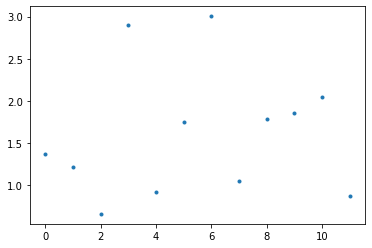

In [10]:
cat, dfs = combine_associated(project_folder=project_folder, project_code=project_code)
cat = magnitude_quakeml(cat=cat, project_folder=project_folder,plot_event=True)
cat.write('catalog_idaho.xml',format='QUAKEML')


catdf = simple_cat_df(cat)
plt.figure()
plt.plot(catdf.origintime,catdf.magnitude,'.')

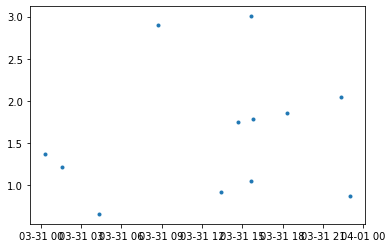

In [12]:
plt.plot(catdf.origintime,catdf.magnitude,'.')